<a href="https://www.kaggle.com/code/kubajdrych/r-analysis-project-bellabeat?scriptVersionId=172185373" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Okay, it's the second time I'm processing and analyzing FitBit Fitness Tracker data. This time, I'll include more datasets. In Python, I only processed and analyzed data from one dataset dailyacitivty_merged.
Read_csv was copied from https://www.kaggle.com/code/trunmalhotra/bellabeat-capstone-project its easier way to copy all paths than write by itself

Annotate! I want to make full experience and gain as much as i can from the datasets.
In real life there is no so much time to do things like that.
Often we need to forfeit some less important analysis from dataset but there i want to make much more and produce good value insights.

In [2]:

weight_log_info <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
sleep_days <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
daily_intensities <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_calories <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
hourly_calories <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
heartrate_seconds <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
minute_sleep <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
hourly_intensities <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
daily_steps <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_activity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column specification for 

In [3]:
head(minute_sleep,5)

Id,date,value,logId
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 2:47:30 AM,3,11380564589
1503960366,4/12/2016 2:48:30 AM,2,11380564589
1503960366,4/12/2016 2:49:30 AM,1,11380564589
1503960366,4/12/2016 2:50:30 AM,1,11380564589
1503960366,4/12/2016 2:51:30 AM,1,11380564589


All data is set now time to gain some insights in more advanced way than from my python code 

In [4]:
sum(is.na(weight_log_info))
sum(is.na(sleep_days))
sum(is.na(daily_intensities))
sum(is.na(daily_calories))
sum(is.na(hourly_calories))
sum(is.na(heartrate_seconds))
sum(is.na(minute_sleep))
sum(is.na(hourly_intensities))
sum(is.na(hourly_steps))
sum(is.na(daily_steps ))
sum(is.na(daily_activity ))

[1] 65

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [5]:
#NA exist in weight_log_info
sum(is.na(weight_log_info$Fat))

[1] 65

In [6]:
#we can move further because onyl one column have NA 
sum(duplicated(weight_log_info))
sum(duplicated(daily_intensities))
sum(duplicated(sleep_days))
sum(duplicated(daily_calories))
sum(duplicated(hourly_calories))
sum(duplicated(heartrate_seconds))
sum(duplicated(minute_sleep))
sum(duplicated(hourly_intensities))
sum(duplicated(hourly_steps))
sum(duplicated(daily_steps ))
sum(duplicated(daily_activity))

[1] 0

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

[1] 543

[1] 0

[1] 0

[1] 0

[1] 0

In [7]:
#distincted our data
dis_sleep_days <- distinct(sleep_days)
dis_minute_sleep <- distinct(minute_sleep)

In [8]:
daily_activity %>%
  group_by(Id) %>%
  summarize(count = n())

Id,count
<dbl>,<int>
1503960366,31
1624580081,31
1644430081,30
1844505072,31
1927972279,31
2022484408,31
2026352035,31
2320127002,31
2347167796,18


In [9]:
# Finding number of participants in each dataset
n_distinct(weight_log_info$Id)  
n_distinct(daily_intensities$Id)   
n_distinct(dis_sleep_days$Id)
n_distinct(hourly_calories$Id)
n_distinct(heartrate_seconds$Id)
n_distinct(dis_minute_sleep$Id)
n_distinct(hourly_intensities$Id)
n_distinct(hourly_steps$Id)
n_distinct(daily_steps $Id)
n_distinct(daily_activity$Id)

[1] 8

[1] 33

[1] 24

[1] 33

[1] 14

[1] 24

[1] 33

[1] 33

[1] 33

[1] 33

In [10]:
#changing 
head(minute_sleep,5) 

Id,date,value,logId
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 2:47:30 AM,3,11380564589
1503960366,4/12/2016 2:48:30 AM,2,11380564589
1503960366,4/12/2016 2:49:30 AM,1,11380564589
1503960366,4/12/2016 2:50:30 AM,1,11380564589
1503960366,4/12/2016 2:51:30 AM,1,11380564589


$x
[1] "Date"

$y
[1] "Weight (kg)"

$title
[1] "Weight Trend Over Time"

attr(,"class")
[1] "labels"

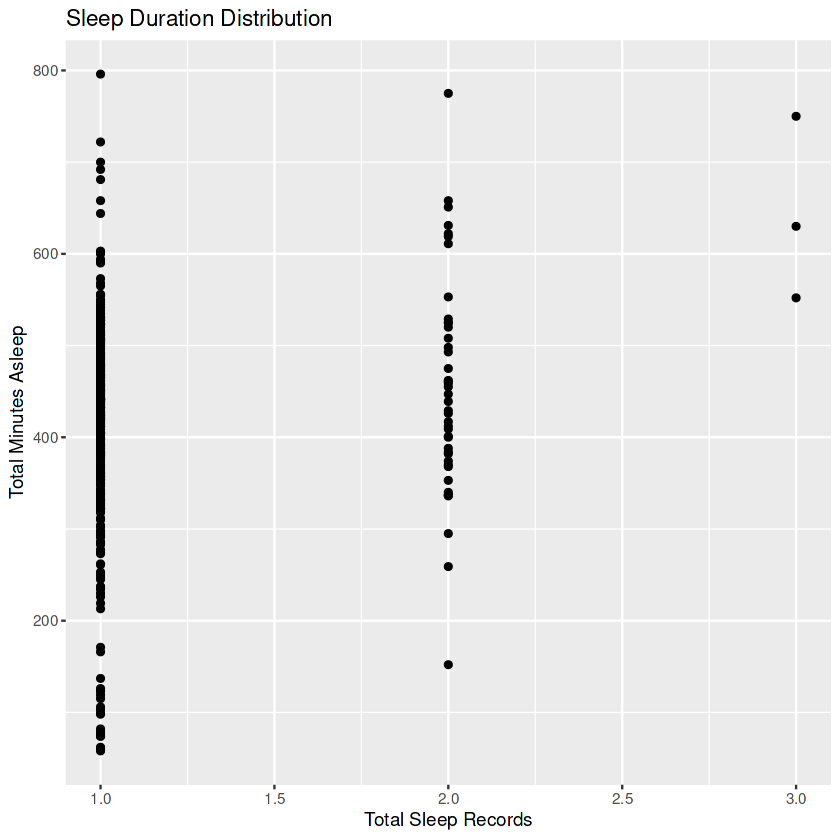

In [11]:
# Plotting sleep duration distribution
ggplot(dis_sleep_days, aes(x = TotalSleepRecords, y = TotalMinutesAsleep)) +
  geom_point() +
  labs(title = "Sleep Duration Distribution", x = "Total Sleep Records", y = "Total Minutes Asleep")
  labs(title = "Weight Trend Over Time", x = "Date", y = "Weight (kg)")